In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
train=pd.read_csv("loan_train.csv")
test=pd.read_csv('loan_test.csv')

In [57]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
train.shape,test.shape

((614, 13), (367, 12))

In [59]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [60]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

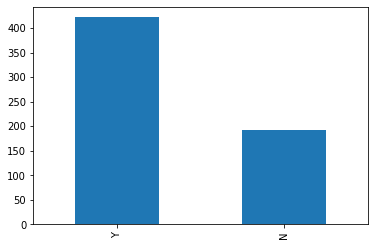

In [61]:
train['Loan_Status'].value_counts().plot.bar()

# Categorical features

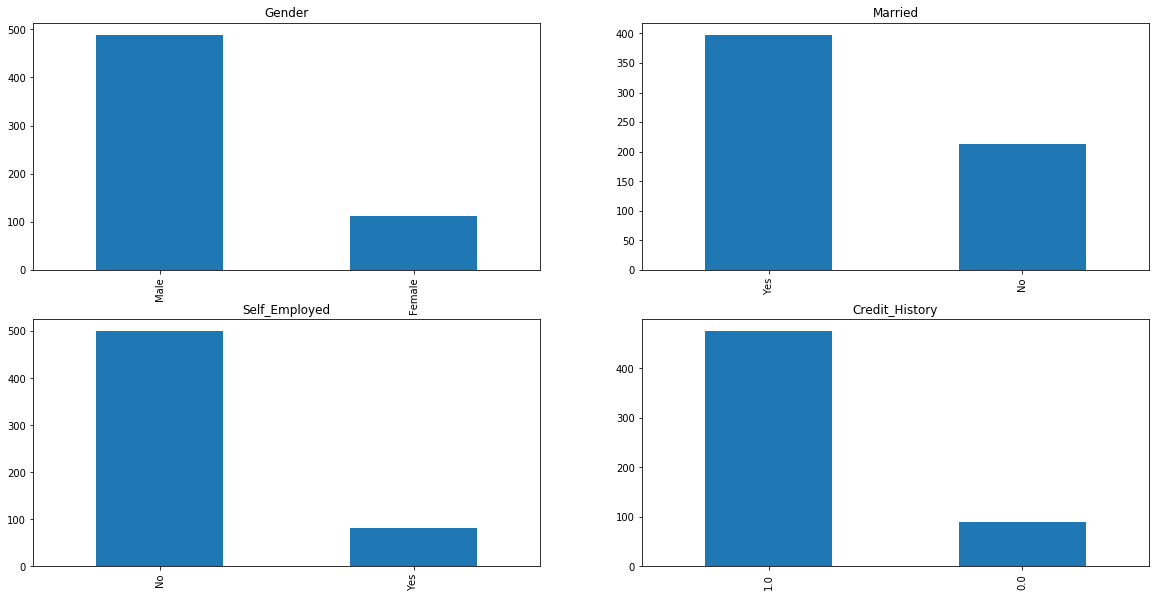

In [62]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts().plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts().plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts().plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts().plot.bar(title= 'Credit_History') 
plt.show()

# Independent Variable

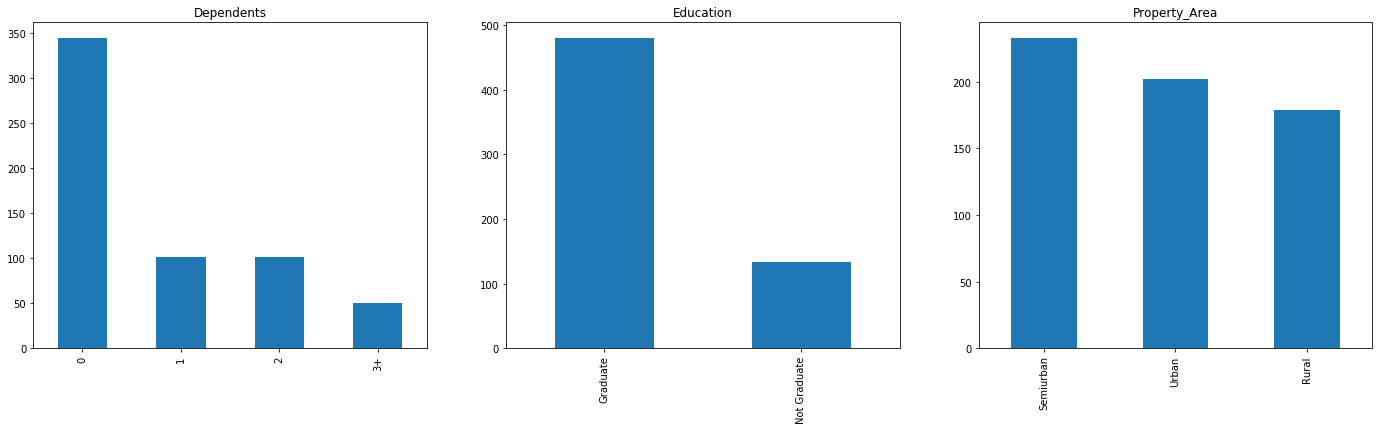

In [63]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts().plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts().plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts().plot.bar(title= 'Property_Area') 
plt.show()

# Independent Variable (Numerical)

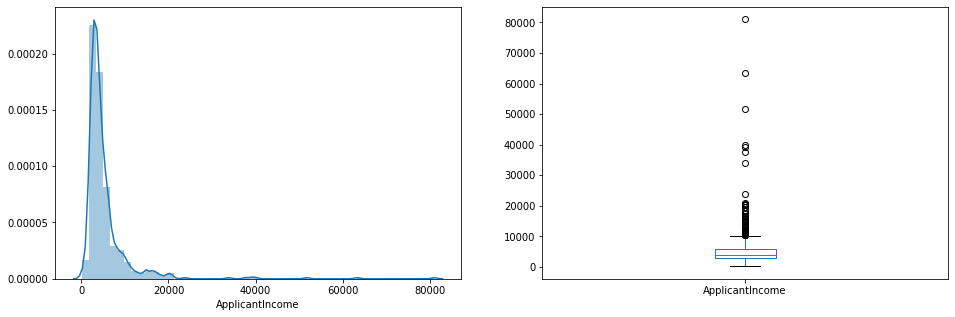

In [64]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

# Missing Value

In [65]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode

In [66]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [67]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True) 
test['Married'].fillna(test['Married'].mode()[0], inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [68]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [69]:
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [70]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

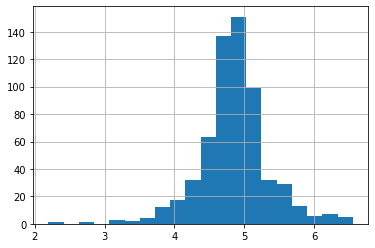

In [71]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20)

In [72]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

# Logistics Regression

In [73]:
X=train.drop(['Loan_Status','LoanAmount_log'],axis=1)
y=train.Loan_Status
yy=train.Loan_Status

In [74]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(accuracy_score(y_test,lr.predict(x_test)))


0.7783783783783784


F:\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
pred_test=lr.predict(test)

In [78]:
submission=pd.read_csv('sample_submission_49d68Cx.csv')

In [79]:
submission.Loan_Status=pred_test


In [80]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [81]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

# Feature Engineering

In [82]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000) 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000) 

In [83]:
X=train.drop(['Loan_Status_N','LoanAmount_log','Loan_Status_Y'],axis=1)
X.columns,test.columns

(Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
        'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
        'Dependents_2', 'Dependents_3+', 'Education_Graduate',
        'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
        'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
        'Total_Income', 'EMI', 'Balance_Income'],
       dtype='object'),
 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
        'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
        'Dependents_2', 'Dependents_3+', 'Education_Graduate',
        'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
        'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
        'Total_Income', 'EMI', 'Balance_Income'],
       dtype='object

# Logistic Regression (Stratified)

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [85]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(accuracy_score(y_test,lr.predict(x_test)))

0.772972972972973


F:\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
pred_test=lr.predict(test)
submission=pd.read_csv('sample_submission_49d68Cx.csv')
submission.Loan_Status=pred_test
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic1.csv')

In [93]:
yd=pd.DataFrame({'Loan_Status':yy})
print(yd.Loan_Status)

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object


# DECISION TREE

In [6]:
train=pd.read_csv("loan_train.csv")
test=pd.read_csv('loan_test.csv')

In [7]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [9]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True) 
test['Married'].fillna(test['Married'].mode()[0], inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [10]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [11]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)
X=train.drop(['Loan_Status'],axis=1)
y=train.Loan_Status
yy=train.Loan_Status

In [12]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [13]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000) 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000) 

In [14]:
X=train.drop(['Loan_Status_N','Loan_Status_Y'],axis=1)
X.columns,test.columns

(Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
        'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
        'Dependents_2', 'Dependents_3+', 'Education_Graduate',
        'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
        'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
        'Total_Income', 'EMI', 'Balance_Income'],
       dtype='object'),
 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
        'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
        'Dependents_2', 'Dependents_3+', 'Education_Graduate',
        'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
        'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
        'Total_Income', 'EMI', 'Balance_Income'],
       dtype='object

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
from sklearn import tree
dt=tree.DecisionTreeClassifier(random_state=123)
dt.fit(x_train,y_train)
print(accuracy_score(y_test,dt.predict(x_test)))

0.6972972972972973


# RANDOM FOREST

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=10,random_state=123)
rf.fit(x_train,y_train)
rf.fit(x_train,y_train)
print(accuracy_score(y_test,rf.predict(x_test)))

0.745945945945946


F:\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':np.arange(1,20,1),'n_estimators':list(range(1,200,20))}
gs=GridSearchCV(rf,param_grid=params,verbose=1,cv=4,)
gs.fit(x_train,y_train)
gs.predict(x_test)
gs.best_params_

Fitting 4 folds for each of 190 candidates, totalling 760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:  2.3min finished
F:\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 6, 'n_estimators': 181}

In [18]:
rfg=RandomForestClassifier(max_depth=6,n_estimators=181,random_state=123)
rfg.fit(x_train,y_train)
rfg.fit(x_train,y_train)
print(accuracy_score(y_test,rfg.predict(x_test)))

0.7783783783783784


# XGBOOST

In [19]:
import xgboost as xgb
xg=xgb.XGBClassifier(n_estimators=60,max_depth=5)
xg.fit(x_train,y_train)
print(accuracy_score(y_test,xg.predict(x_test)))

0.7675675675675676


In [20]:
params2={'max_depth':np.arange(1,20,1),'n_estimators':list(range(1,200,20))}
xgg=GridSearchCV(xg,param_grid=params2,verbose=1,cv=4)
xgg.fit(x_train,y_train)
xgg.predict(x_test)
xgg.best_params_

Fitting 4 folds for each of 190 candidates, totalling 760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:  1.9min finished


{'max_depth': 2, 'n_estimators': 21}

In [21]:
xgg=xgb.XGBClassifier(max_depth=2,n_estimators=21,random_state=123)
xgg.fit(x_train,y_train)
xgg.fit(x_train,y_train)
print(accuracy_score(y_test,xgg.predict(x_test)))

0.772972972972973
